In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
movies = pd.read_csv('data\movies.csv')
actors = pd.read_csv('data\performers.csv')

#### Promedio del ranking de las peliculas en las que ha participado cada actor.

In [20]:
movies_actors = pd.merge(movies, actors, on='id', how='inner',suffixes=('_m', '_a'))
movies_actors_filtered = movies_actors.dropna(subset=['rating'])

relacion_actor_promedio_ranking = movies_actors_filtered.groupby('name_a').agg({'rating': 'mean', 'id': 'count'})
relacion_actor_promedio_ranking = relacion_actor_promedio_ranking.rename(columns={'id': 'cantidad_peliculas'})
#relacion_actor_promedio_ranking.describe()


In [21]:
relacion_actor_promedio_ranking = relacion_actor_promedio_ranking.sort_values(by='rating',ascending=False)
#print(relacion_actor_promedio_ranking)
#Length: 1513886
#541814


In [22]:
top_30_actores = relacion_actor_promedio_ranking.head(30)
#print(top_30_actores)

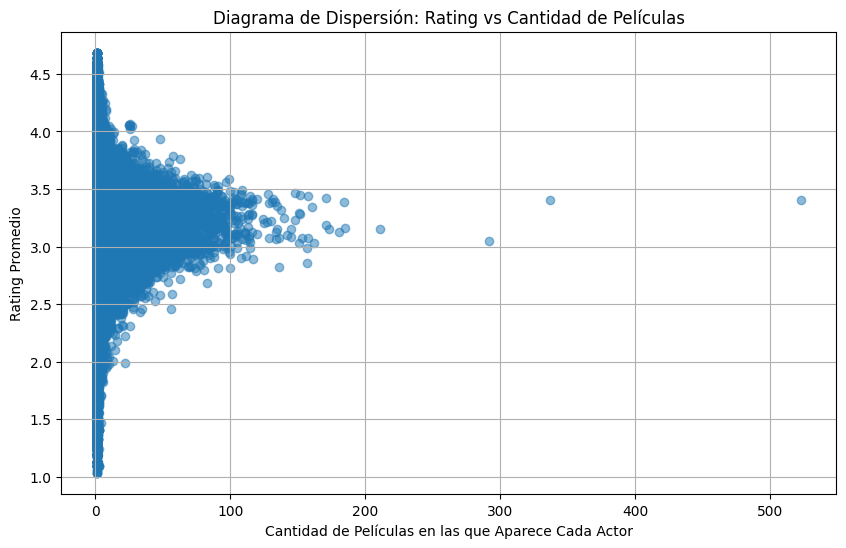

In [23]:
# Suponiendo que tienes la tabla relacion_actorT_promedio_ranking_peliculasmasque2
# relacion_actorT_promedio_ranking_peliculasmasque2 es el DataFrame que contiene las columnas name_z, rating y cantidad_peliculas

# Graficar el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(relacion_actor_promedio_ranking['cantidad_peliculas'], relacion_actor_promedio_ranking['rating'], alpha=0.5)
plt.title('Diagrama de Dispersión: Rating vs Cantidad de Películas')
plt.xlabel('Cantidad de Películas en las que Aparece Cada Actor')
plt.ylabel('Rating Promedio')
plt.grid(True)
plt.show()

El tops de actores están dominados por actores antiguos y japoneses. Pensamos que puede haber problemas tomando en cuenta 
que hay actores que pudieron haber en tan solo una pelicula que fue bien, o que los años en los que actuaba el actor. Estos dos 
parametros podrían generar outliers.

In [24]:
relacion_actor_promedio_ranking_truncado = relacion_actor_promedio_ranking[relacion_actor_promedio_ranking['cantidad_peliculas']>=2]
#relacion_actor_promedio_ranking_truncado.describe()

In [25]:
#print(relacion_actor_promedio_ranking_truncado)

#### Filtro de peliculas: A partir del año 2000.

In [26]:
movies_2000 = movies[movies['date'] >= 2000]
#518.860 peliculas creadas a partir del 2000
#print(movies_2000.shape)

In [27]:
movies_actorsT = pd.merge(movies_2000, actors, on='id', how='inner',suffixes=('_m', '_a'))
movies_actorsT_filtered = movies_actorsT.dropna(subset=['rating'])

relacion_actorT_promedio_ranking = movies_actorsT_filtered.groupby('name_a').agg({'rating': 'mean', 'id': 'count'})
relacion_actorT_promedio_ranking = relacion_actorT_promedio_ranking.rename(columns={'id': 'cantidad_peliculas'})


In [28]:
relacion_actorT_promedio_ranking = relacion_actorT_promedio_ranking.sort_values(by='rating',ascending=False)

#print(relacion_actorT_promedio_ranking)
#Length: 1513886
top_30_actoresT = relacion_actorT_promedio_ranking.head(30)

#print(top_30_actores)
#relacion_actorT_promedio_ranking.describe()

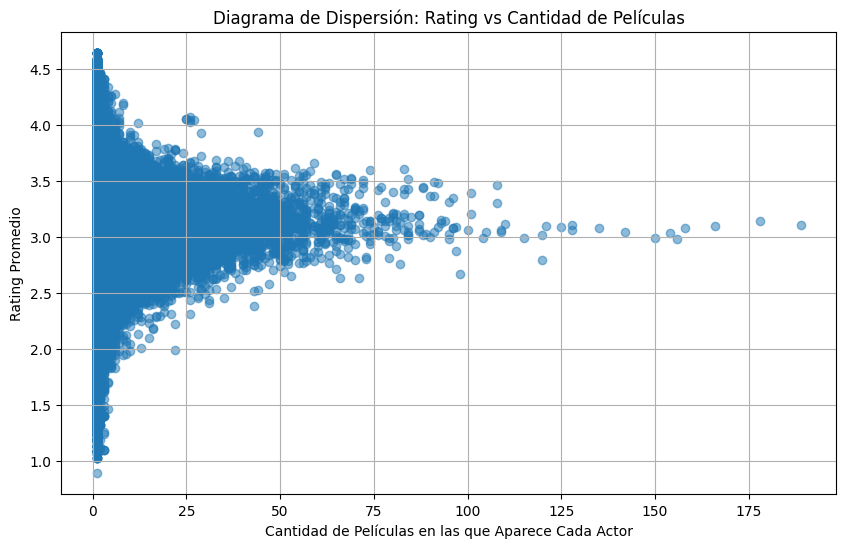

In [29]:
# Graficar el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(relacion_actorT_promedio_ranking['cantidad_peliculas'], relacion_actorT_promedio_ranking['rating'], alpha=0.5)
plt.title('Diagrama de Dispersión: Rating vs Cantidad de Películas')
plt.xlabel('Cantidad de Películas en las que Aparece Cada Actor')
plt.ylabel('Rating Promedio')
plt.grid(True)
plt.show()

In [30]:
relacion_actorT_promedio_ranking_peliculasmasque2 = relacion_actorT_promedio_ranking[relacion_actorT_promedio_ranking['cantidad_peliculas']>=2]
#print(relacion_actorT_promedio_ranking_peliculasmasque2)
#relacion_actorT_promedio_ranking_peliculasmasque2.describe()

In [31]:
actor_moviesT_ord = relacion_actorT_promedio_ranking_peliculasmasque2.sort_values(by=['cantidad_peliculas', 'rating'], ascending=False)
#print(actor_moviesT_ord.head(30))

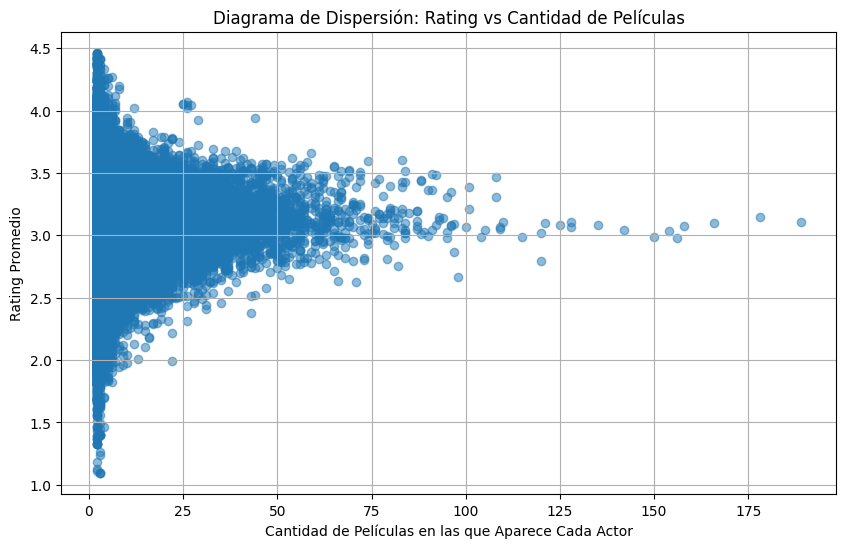

In [32]:
# Suponiendo que tienes la tabla relacion_actorT_promedio_ranking_peliculasmasque2
# relacion_actorT_promedio_ranking_peliculasmasque2 es el DataFrame que contiene las columnas name_z, rating y cantidad_peliculas

# Graficar el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(relacion_actorT_promedio_ranking_peliculasmasque2['cantidad_peliculas'], relacion_actorT_promedio_ranking_peliculasmasque2['rating'], alpha=0.5)
plt.title('Diagrama de Dispersión: Rating vs Cantidad de Películas')
plt.xlabel('Cantidad de Películas en las que Aparece Cada Actor')
plt.ylabel('Rating Promedio')
plt.grid(True)
plt.show()